# Setup

In [1]:
from proj4_code.utils import load_image, PIL_resize, generate_random_stereogram, stereo_helper_fn
from proj4_code.disparity_map import calculate_disparity_map
from proj4_code.similarity_measures import ssd_similarity_measure, sad_similarity_measure

import torch
import numpy as np

import matplotlib.pyplot as plt

from unit_tests.test_base import verify

%load_ext autoreload
%autoreload 2

We will use a helper function called stereo_helper_fn for utils.py for calculating and plotting the disparity maps using the functions defined by you

# Random dot stereogram

**Deliverables**:
All the disparity maps
+
Observations and Analysis:
1. What is the effect of increasing the block size? 
2. Why is the result poor on the left edge and not on the other edges?

Note that implementations in disparity_map.py and similarity_measures.py should be completed before this section can work. 

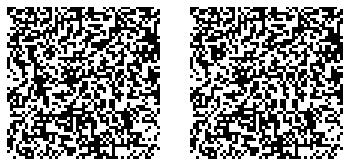

In [2]:
#generate left and right images
im_left, im_right = generate_random_stereogram(im_size=(51, 51, 3))
fig, axs = plt.subplots(1,2)
for ax , img in zip(axs, [im_left, im_right]):
    ax.imshow(img) 
    ax.axis('off')

In [3]:
from unit_tests.test_utils import test_generate_random_stereogram

print('Test for random dot stereogram', verify(test_generate_random_stereogram))

Test for random dot stereogram "Correct"


Implement the similarity function and disparity map calculation. You will need it in the next steps

In [6]:
from unit_tests.test_similarity_measures import (
  test_ssd_similarity_measure_values, 
  test_sad_similarity_measure_values, 
  test_similarity_measure_size_compatibility
)

print('Testing value for SAD measure', verify(test_sad_similarity_measure_values))
print('Testing value for SSD measure', verify(test_ssd_similarity_measure_values))
print('Testing input size compatibility for measures', verify(test_similarity_measure_size_compatibility))

  

Testing value for SAD measure "Correct"
Testing value for SSD measure "Correct"
Testing input size compatibility for measures "Correct"


In [7]:
from unit_tests.test_disparity_map import (
  test_disparity_deltafn_failure,
  test_disparity_deltafn_success,
  test_disparity_map_size,
  test_disparity_random_stereogram,
  test_disparity_translation_shift
)

In [37]:
print('Testing for disparity map on a delta function', verify(test_disparity_deltafn_failure))
print('Testing for disparity map on a delta function', verify(test_disparity_deltafn_success))
print('Testing disparity map size', verify(test_disparity_map_size))
print('Testing random stereogram ouptut', verify(test_disparity_random_stereogram))
print('Testing disparity on translation shift', verify(test_disparity_translation_shift))

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        ...,
        [50, 48],
        [50, 49],
        [50, 50]])
Testing for disparity map on a delta function "Wrong"
Testing for disparity map on a delta function "Wrong"
Testing disparity map size "Correct"
Testing random stereogram ouptut "Correct"
Testing disparity on translation shift "Correct"


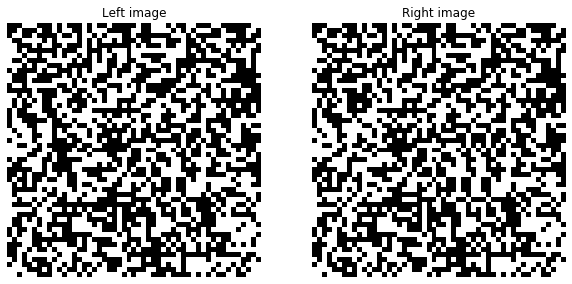

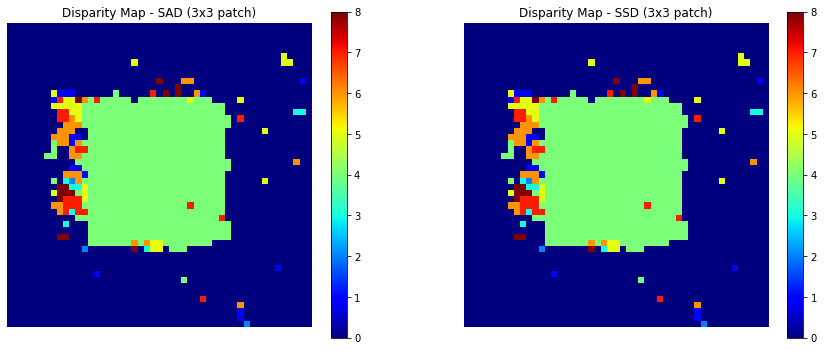

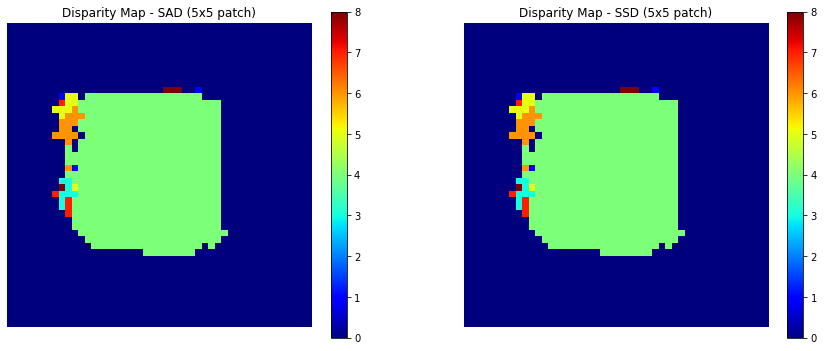

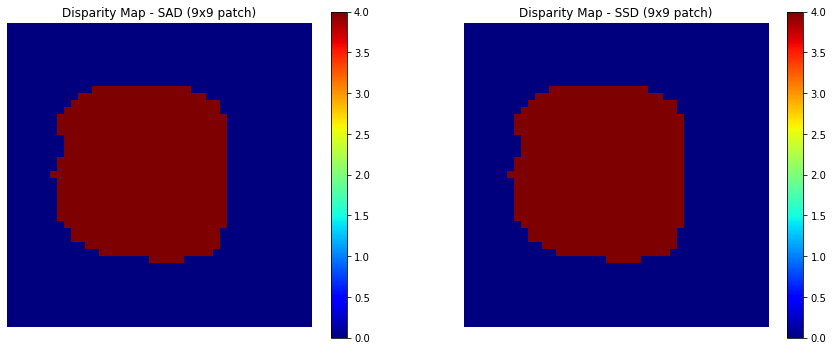

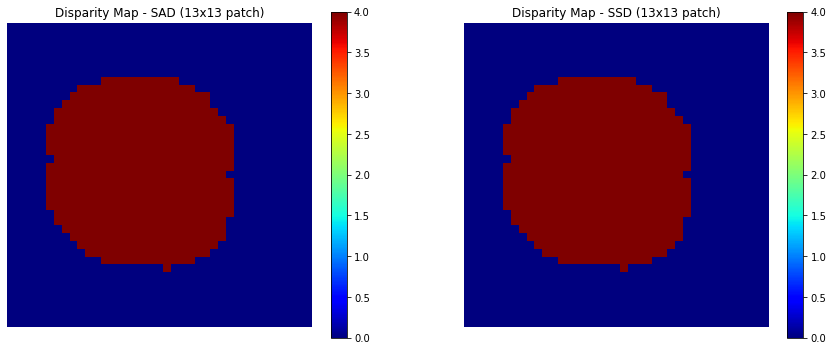

In [38]:
stereo_helper_fn(im_left, im_right, block_size = [3,5,9,13], max_search_bound=8)

# Error profile analysis

Before computing the full disparity map, we will analyse the similarity error between patches. You will have to find out different patches in the image which exhibit a close-to-convex error profile, and a highly non-convex profile.

**Deliverable**:
Find the patch in the left image and search space in the right image, and the similarity error plot for the two cases, and copy it to the report

In [39]:
# Load the image
base_path = '../data/adirondack/'
im_left = PIL_resize(load_image(base_path + 'im_left.png'), (0.1, 0.1))
im_right = PIL_resize(load_image(base_path + 'im_right.png'), (0.1, 0.1))

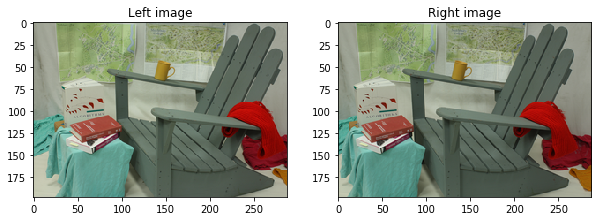

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

ax1.imshow(im_left, interpolation=None)
ax1.title.set_text('Left image')
ax1.autoscale(False)
ax1.set_axis_on()

ax2.imshow(im_right, interpolation=None)
ax2.title.set_text('Right image')
ax2.autoscale(False)
ax2.set_axis_on()

plt.show()

## Convex error profile

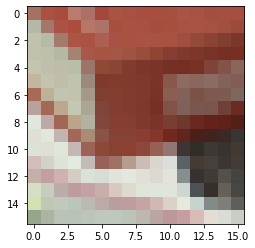

In [43]:
# extract a patch of interest from the left image
patch_size=15
x_idx, y_idx = (125, 50) #(None, None) # TODO: replace with integers
patch_left_img = torch.tensor(im_left[x_idx:x_idx+patch_size+1, y_idx:y_idx+patch_size+1,:])
plt.imshow(patch_left_img)
plt.show()

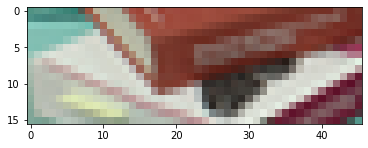

In [44]:
# get the search area in the right image
max_search_bound = 30 # might need adjustment based on your (x_idx, y_idx)
search_area_right_img = torch.tensor(
  im_right[x_idx:x_idx+patch_size+1, y_idx-max_search_bound:y_idx+patch_size+1,:]
)
plt.imshow(search_area_right_img)
plt.show()

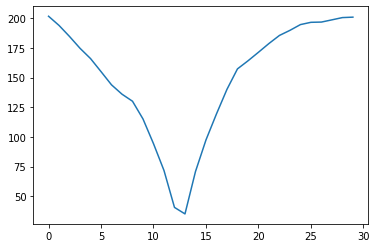

In [45]:
similarity_vals = np.array(
  [sad_similarity_measure(patch_left_img, search_area_right_img[:,h_idx:h_idx+patch_size+1,:]) 
   for h_idx in range(search_area_right_img.shape[1]-patch_size-1)
  ])
plt.plot(similarity_vals)
plt.show()

## Non-Convex error profile

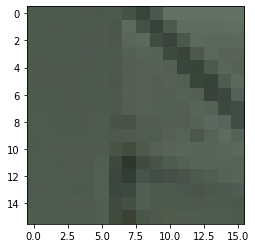

In [47]:
# extract a patch of interest from the left image
patch_size=15
x_idx, y_idx = (150, 150) #(None, None) # TODO: replace with integers
patch_left_img = torch.tensor(im_left[x_idx:x_idx+patch_size+1, y_idx:y_idx+patch_size+1,:])
plt.imshow(patch_left_img)
plt.show()

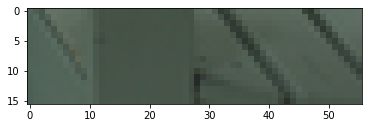

In [48]:
# get the search area in the right image
max_search_bound = 40 # might need adjustment based on your (x_idx, y_idx)
search_area_right_img = torch.tensor(
  im_right[x_idx:x_idx+patch_size+1, y_idx-max_search_bound:y_idx+patch_size+1,:]
)
plt.imshow(search_area_right_img)
plt.show()

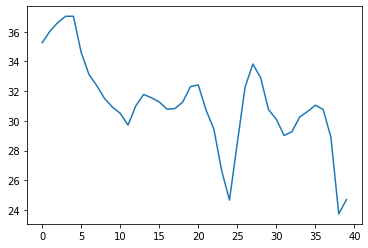

In [49]:
similarity_vals = np.array(
  [sad_similarity_measure(patch_left_img, search_area_right_img[:,h_idx:h_idx+patch_size+1,:]) 
   for h_idx in range(search_area_right_img.shape[1]-patch_size-1)
  ])
plt.plot(similarity_vals)
plt.show()

# Real life stereo images

## Example 1

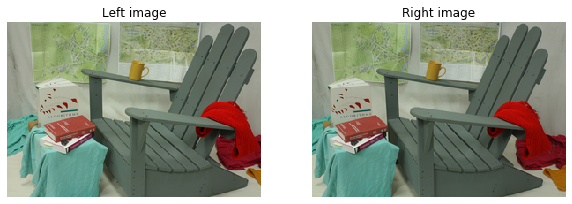

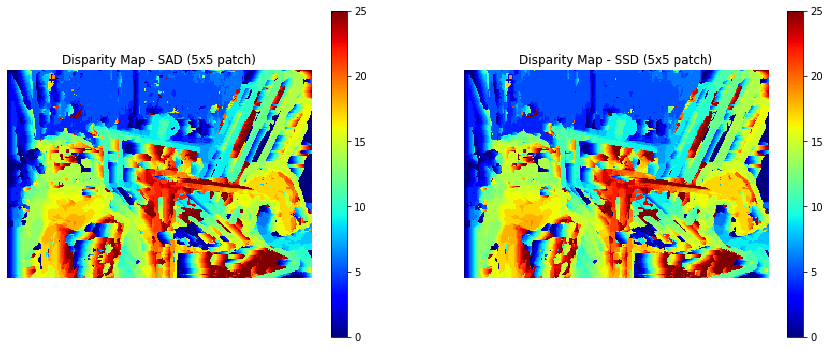

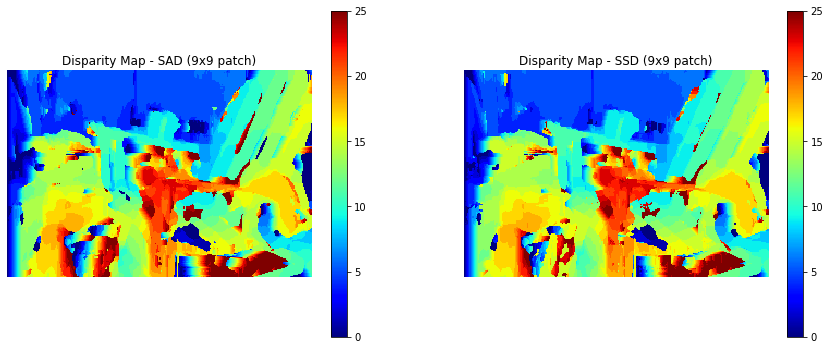

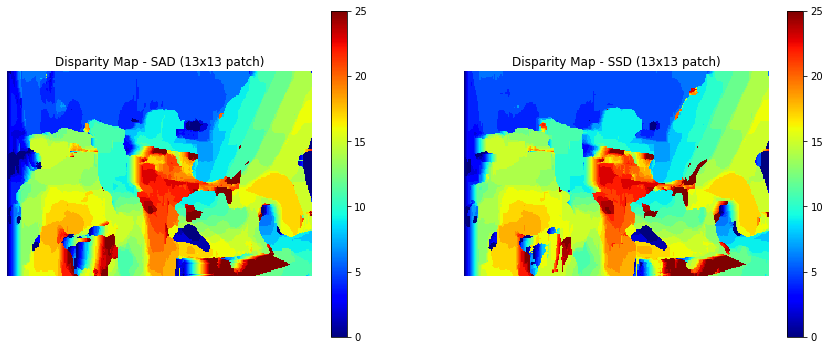

In [50]:
stereo_helper_fn(torch.tensor(im_left), torch.tensor(im_right), max_search_bound=25)

**Deliverables**
1. Copy the disparity map for the patch size you feel works the best
2. Can you think of an explanation as to why the back rest of the chair appears *blocky*?

Tip: you can see all the examples and deliverables before answering. This will help you understand the core ideas being asked.

## Set 2

In [51]:
base_path = '../data/bicycle/'
im_left = PIL_resize(load_image(base_path + 'im_left.png'), (0.1, 0.1))
im_right = PIL_resize(load_image(base_path + 'im_right.png'), (0.1, 0.1))

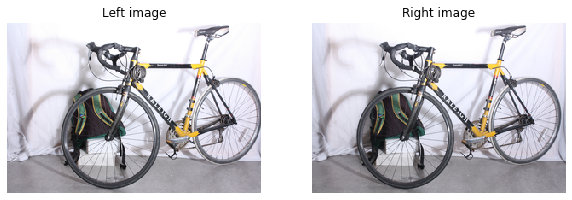

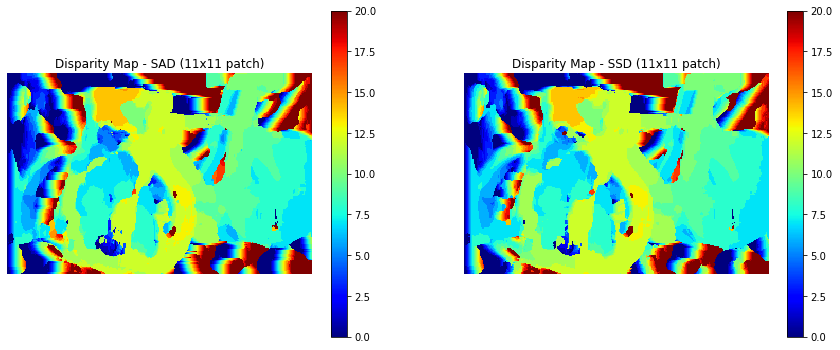

In [52]:
stereo_helper_fn(torch.tensor(im_left), torch.tensor(im_right), block_size=[11], max_search_bound=20)

## Set 3

In [53]:
base_path = '../data/bowling/'
im_left = PIL_resize(load_image(base_path + 'im_left.png'), (0.2, 0.2))
im_right = PIL_resize(load_image(base_path + 'im_right.png'), (0.2, 0.2))

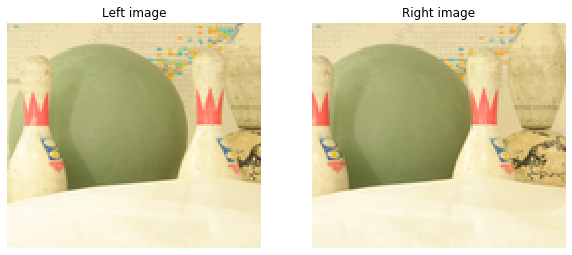

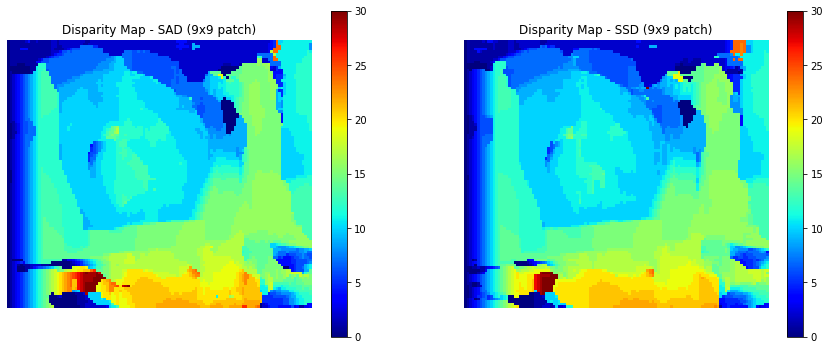

In [54]:
stereo_helper_fn(torch.tensor(im_left), torch.tensor(im_right), block_size=[9], max_search_bound=30)

## Set 4

In [55]:
base_path = '../data/bowling2/'
im_left = PIL_resize(load_image(base_path + 'im_left.png'), (0.20, 0.20))
im_right = PIL_resize(load_image(base_path + 'im_right.png'), (0.20, 0.20))

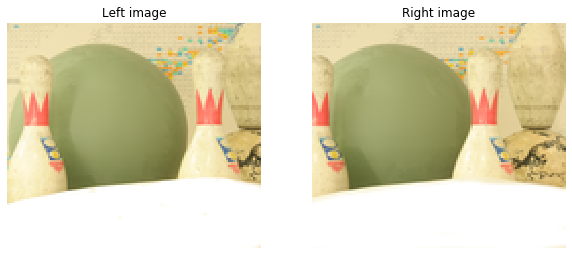

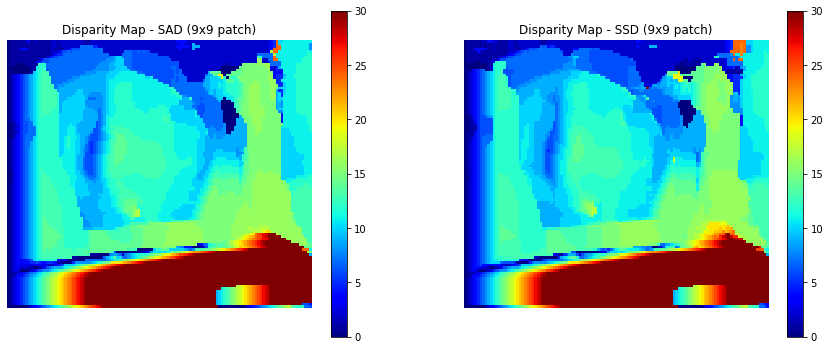

In [56]:
stereo_helper_fn(torch.tensor(im_left), torch.tensor(im_right), block_size=[9], max_search_bound=30)

**Deliverables** of set 3 and set 4 combined:

1. Copy the disparity maps from set 4 in the report
2. Can you spot a peculiar behaviour of the diaprity maps near the head of bowling pin on the right? What do you see in the input images in that area? Can you figure out the reason behind this behaviour?
3. Notice that we have manipulated the images in set 4 to generate set 4 images. This leads to a difference in disparity map results in the bottom of the image and on the green bowling ball. Can you explain why the disparity drops to zero in both these regions.

## Set 5

In [57]:
base_path = '../data/flowers/'
im_left = PIL_resize(load_image(base_path + 'im_left.png'), (0.10, 0.10))
im_right = PIL_resize(load_image(base_path + 'im_right.png'), (0.10, 0.10))

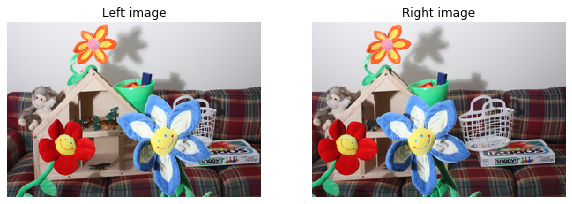

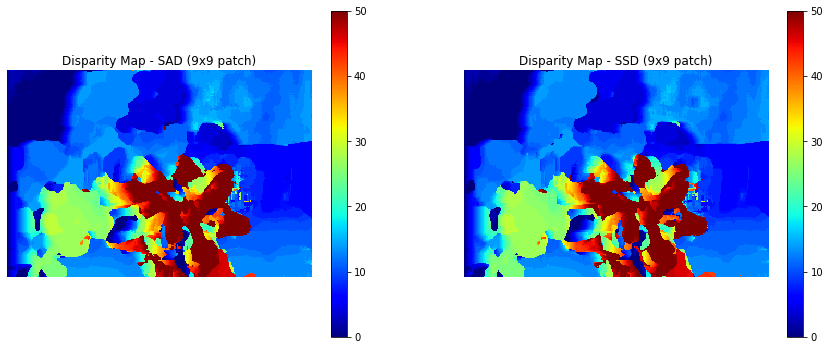

In [58]:
stereo_helper_fn(torch.tensor(im_left), torch.tensor(im_right), block_size=[9], max_search_bound=50)

**Observations**: (these observations do not go in the report. These are for your understanding).

1. Notice the different disparity of the flower at the back and its shadow
2. Spot the zero-disparity region in the center of the house
3. See how smooth the disparity values are on the couch

## Set 6

In [59]:
base_path = '../data/stairs/'
im_left = PIL_resize(load_image(base_path + 'im_left.jpg'), (1, 1))
im_right = PIL_resize(load_image(base_path + 'im_right.jpg'), (1, 1))

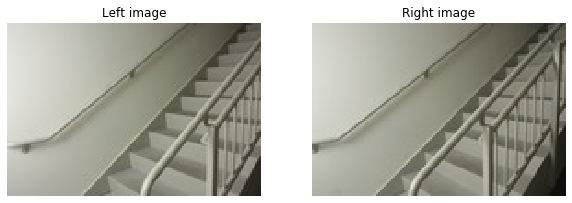

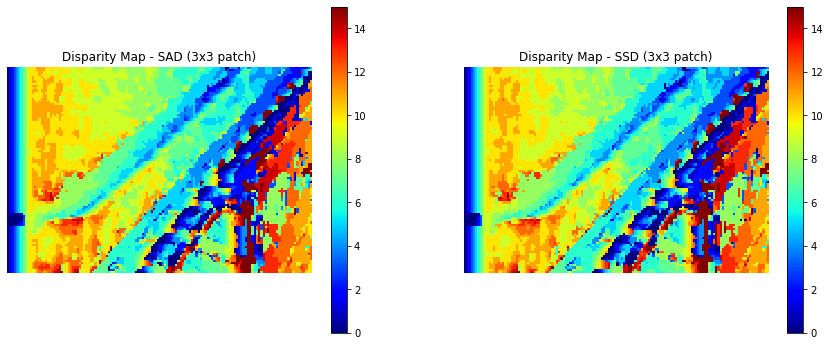

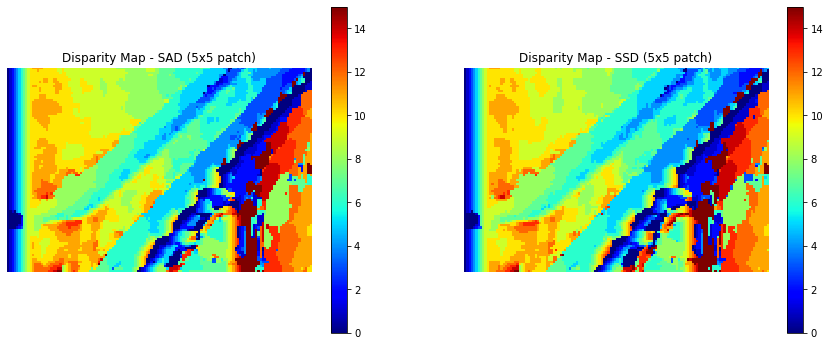

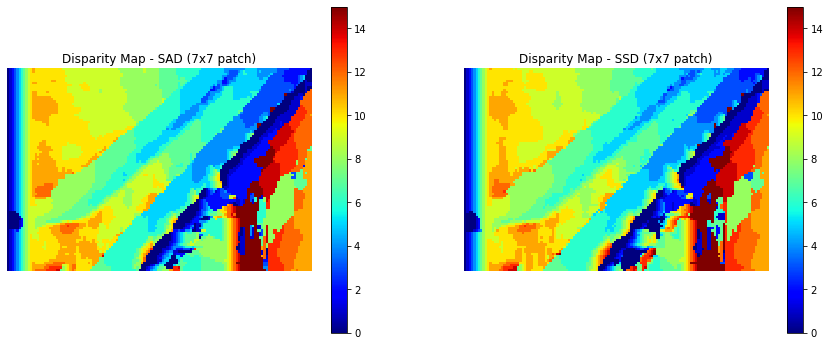

In [60]:
stereo_helper_fn(torch.tensor(im_left), torch.tensor(im_right), block_size = [3, 5, 7], max_search_bound=15)

**Deliverables**

1. Why are we able to see the shift in disparity values on the wall?
2. What is the effect of block_size and the ability to see stairs-like structure in the disparity map?

# Smoothing

One issue with the results from is that they aren't very smooth. Pixels next to each other on the same surface can have vastly different disparities, making the results look very noisy and patchy in some areas. Intuitively, pixels next to each other should have a smooth transition in disparity(unless at an object boundary or occlusion).
In this section, we try to improve our results. One way of doing this is through the use of a smoothing constraint. The smoothing method we use is called Semi-Global Matching(SGM) or Semi-Global Block Matching. Before, we picked the disparity for a pixel based on the minimum matching cost of the block using some metric(SSD or SAD). The basic idea of SGM is to penalize pixels with a disparity that's very different than their neighbors by adding a penalty term on top of the matching cost term. SGM tries to minimize the global(over the entire image) energy function
\begin{equation*}
E(D) \leq \sum_{p} (C(p, D_p) + \sum_{q} PT(|D_p - D_q|))
\end{equation*}
C(p,D_p) is the matching cost for a pixel with disparity D_p, q is a neighboring pixel, and PT is some penalty function penalizing the difference in disparities.
You can read more about how this method works and is optimized here:
https://elib.dlr.de/73119/1/180Hirschmueller.pdf
and
https://pdfs.semanticscholar.org/bcd8/4d8bd864ff903e3fe5b91bed3f2eedacc324.pdf

Before we implement the smoothing algorithm, we need to implement a function which computes the **cost volume**. We have already written code to compute disparity map. We will extend that code to compute the cost volume. Instead of taking the argmin of the similarity error profile, we will store the tensor of error profile at each pixel location along the third dimension.

If we have an input image of dimension (H,W,C) and max search bound of D, the cost_volume will be a tensor of dimension (H,W,D). The cost volumne at (i,j) pixel is the error profile obtained for the patch in the left image centered at (i,j).

Implement this part as function ```calculate_cost_volume``` in ```disparity_map.py```. Feel free to reuse any code you have written till now.

In [79]:
from unit_tests.test_disparity_map import (
  test_calculate_cost_volume
)

print('Testing for calculate_cost_volume', verify(test_calculate_cost_volume))

Testing for calculate_cost_volume "Correct"



Starting cost computation...

Starting aggregation computation...
	Processing paths east and west...	(done in 2.72 s)
	Processing paths south-east and north-west...	(done in 2.82 s)
	Processing paths south and north...	(done in 2.73 s)
	Processing paths south-west and north-east...	(done in 2.80 s)

Selecting best disparities...

Done


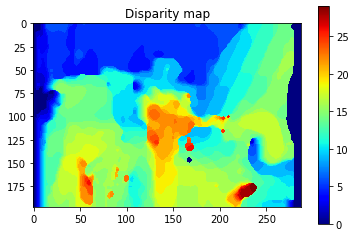

In [80]:
# Load the image
from semiglobalmatching.sgm import sgm
from scipy import ndimage
from proj4_code.similarity_measures import sad_similarity_measure, ssd_similarity_measure

#you can change the path to try other pairs, but you may need to fix the scaling per pair
base_path = '../data/adirondack/'
im_left = PIL_resize(load_image(base_path + 'im_left.png'), (0.10, 0.10))
im_right = PIL_resize(load_image(base_path + 'im_right.png'), (0.10, 0.10))

#calculates the disparity map with SGM, the last argument is max disparity to consider
disparity_map = sgm(im_left,im_right, "result", 30, sad_similarity_measure, 9)
result = ndimage.median_filter(disparity_map, size=5)
plt.figure()
plt.imshow(result, cmap='jet', interpolation='nearest')
plt.title('Disparity map')
plt.colorbar()
plt.show()

**Deliverables**

1. Compare these results qualitatively to the output of the chair image without smoothing.
2. What regions of the image does smoothing seem to perform better on and why do you think that is?
3. What regions of the image does smoothing seem to perform worse on and why do you think that is?
4. Would smoothing still work for images with both a horizontal and vertical shift?


(Extra Credit)Try the above smoothing with your own image pair! Take 2 images with only(or mostly) a horizontal shift, and see the result by editing the image paths and running the code. If you get good results, explain why your image pair is "easy". If you get bad results, explain why your pair is "hard". These results go in the extra credit slides. 